In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
veri = pd.read_csv("../input/drug-classification/drug200.csv")
veri.head()
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [3]:
#Categorical data converting to numerical
veri.Sex = (veri.Sex == "F").astype(int)
le = LabelEncoder()
oe = OrdinalEncoder()
veri.BP = le.fit_transform(veri.BP)
veri.Cholesterol = le.fit_transform(veri.Cholesterol)
veri.Drug = le.fit_transform(veri.Drug)
veri.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,0,25.355,0
1,47,0,1,0,13.093,3
2,47,0,1,0,10.114,3
3,28,1,2,0,7.798,4
4,61,1,1,0,18.043,0
5,22,1,2,0,8.607,4
6,49,1,2,0,16.275,0
7,41,0,1,0,11.037,3
8,60,0,2,0,15.171,0
9,43,0,1,1,19.368,0


Age            0.041856
Sex           -0.018239
BP             0.419397
Cholesterol    0.048415
Na_to_K       -0.689051
Drug           1.000000
Name: Drug, dtype: float64

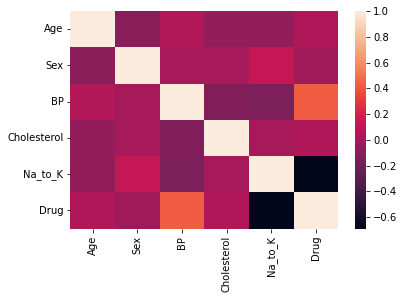

In [4]:
#Correalation
sns.heatmap(veri.corr())
corr = veri.corr().iloc[:,-1]
corr

In [5]:
#Seperating
Y = veri[["Drug"]]
X = veri.drop(["Drug"],axis=1)
#Scaling
sc = StandardScaler()
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 42)
xtrain_s = sc.fit_transform(xtrain)
xtest_s = sc.fit_transform(xtest)
xtrain_s = pd.DataFrame(xtrain_s)
xtest_s = pd.DataFrame(xtest_s)


In [6]:
#Predicting
knn = KNeighborsClassifier()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
clfer = [knn,svc,rfc,dtc,lr]

#for clf in clfer:
#clf.fit(xtrain_s,ytrain)
knn.fit(xtrain_s,ytrain)
svc.fit(xtrain_s,ytrain)
dtc.fit(xtrain_s,ytrain)
rfc.fit(xtrain_s,ytrain)
lr.fit(xtrain_s,ytrain)

lrp = lr.predict(xtest_s)
knnp = knn.predict(xtest_s)
rfcp = rfc.predict(xtest_s)
dtcp = dtc.predict(xtest_s)
svcp = svc.predict(xtest_s)

predicts = [lrp,svcp,knnp,rfcp,dtcp]

for i in predicts:
    a = accuracy_score(i,ytest)
    print("Accuracy score :",a)
for j in predicts:   
    b = balanced_accuracy_score(j,ytest)
    print("Balanced accuracy score :",b)  



Accuracy score : 0.94
Accuracy score : 0.92
Accuracy score : 0.86
Accuracy score : 0.98
Accuracy score : 0.98
Balanced accuracy score : 0.930952380952381
Balanced accuracy score : 0.9227272727272726
Balanced accuracy score : 0.9019999999999999
Balanced accuracy score : 0.95
Balanced accuracy score : 0.95
